In [12]:
import agent as myagents
import gym
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils
from copy import deepcopy

### Environnement

In [13]:
env = gym.make('MountainCar-v0')
seed = 12
train_session = None

### Agents

In [14]:
position_boundaries = (env.observation_space.low[0], env.observation_space.high[0])
velocity_boundaries = (env.observation_space.low[1], env.observation_space.high[1])

num_action = env.action_space.n

agent_to_train = None
timesteps_per_episode_per_agent_array = {}

#### Sarsa

In [15]:
agent_init = {
    'seed': seed,
    'discount_factor': .99, 
    'learning_rate': 0.5, 
    'exploration_rate': {
        'er': 0.0001,
        'max_er': 1,
        'min_er': 0.0,
        'decay_er': 0.05,
        'constant_er': True
    },
    'num_action': num_action,
    'max_position_init': position_boundaries[0],
    'max_position_reward_bonus': 0,
    'trace_decay': 0.8,
    'eligibility_method': 'replace',
    'tile_coder': {
        'num_tiles': 8,
        'num_tilings': 20,
        'hash_size': 4096,
        'position_boundaries': position_boundaries, 
        'velocity_boundaries': velocity_boundaries
    }
}

In [16]:
if not train_session:
    print('Train Session reset')
    train_session = utils.TrainSession({}, env, seed)

Train Session reset


### RUN

In [17]:
agent_init_accumulate = deepcopy(agent_init)
agent_init_accumulate["trace_decay"] = 0.3
agent_init_accumulate["eligibility_method"] = 'accumulate'

agent_init_replace = deepcopy(agent_init)
agent_init_replace["trace_decay"] = 0.9
agent_init_replace["eligibility_method"] = 'replace'

agents = {
    'sarsa': myagents.SarsaAgent(agent_init)
}
added_agent_name = train_session.append_agents(agents)

In [22]:
n_episode = 4
t_max_per_episode = 500
graphical = True

In [23]:
train_session.train(n_episode=n_episode, graphical=graphical, agent_subset=added_agent_name)

100%|██████████| 4/4 [00:06<00:00,  1.68s/it]


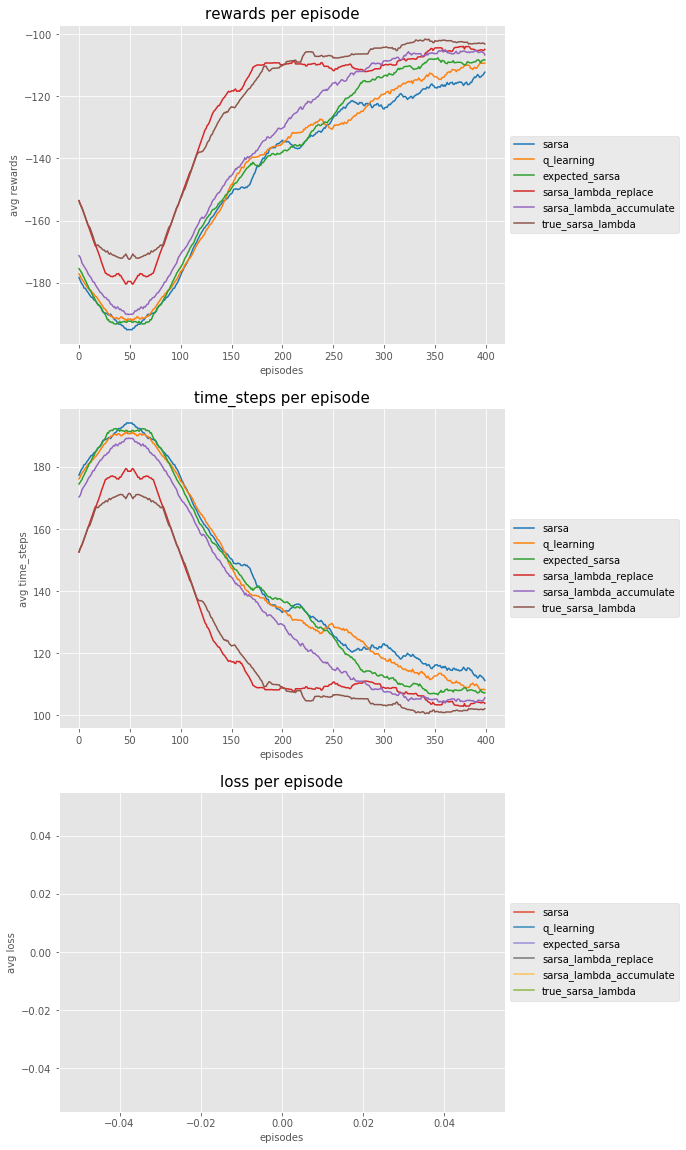

In [9]:
train_session.plot_results(window=100, agent_subset=added_agent_name, std=False)